# Проект - "Анализ рекламных источников в игре" 

Основной датасет содержит данные о событиях, совершенных в мобильной игре «Космические братья». В ней пользователи строят свою космическую программу и пытаются преуспеть в нелёгком деле колонизации галактики. Основная монетизация игры — только планируется. Но предполагается, что в приложении будет происходить показ рекламы на экране с выбором типа объекта для постройки. В датасете представлены данные по игре пользователей на первом уровне. Завершение первого уровня требует от игрока выполнения одного из двух условий:

- Победа над первым врагом
- Реализация проекта - разработка орбитальной сборки спутников

В датасете содержатся данные первых пользователей приложения — когорты пользователей, которые начали пользоваться приложением в период с 4 по 10 мая включительно.

Задача:

Проанализируйте поведения игроков в зависимости от источника перехода.
- Проведите исследовательский анализ данных;
- Проанализируйте влияние источника перехода в игру на поведение пользователя;
- Проверьте статистические гипотезы:
    1. Проверьте гипотезу: время завершения уровня различается в зависимости способа прохождения:
        - через реализацию проекта,
        - через победу над первым игроком.
    2. Сформулируйте собственную статистическую гипотезу. Дополните её нулевой и альтернативной гипотезами. Проверьте гипотезу с помощью статистического теста.
    

Презентация - https://disk.yandex.ru/i/rO8H5auuQl8xPg


Дашборд - https://public.tableau.com/views/_16523584313770/sheet2?:language=en-US&:display_count=n&:origin=viz_share_link

## Оглавление

1. Изучение данных из файла
2. Подготовка данных
3. Исследовательский анализ данных
4. Проверка гипотез
5. Общий вывод

##  1. Изучение данных из файла 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import math as mth
import plotly.express as px 
from scipy import stats as st
from pandas.plotting import register_matplotlib_converters
from plotly import graph_objects as go
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:,.2f}'.format)
register_matplotlib_converters()

In [2]:
# База по пользователям
users_data = pd.read_csv('/datasets/user_source.csv')
display(users_data.head())
users_data.info()

,user_id,source
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,facebook_ads
1,00151b4f-ba38-44a8-a650-d7cf130a0105,yandex_direct
2,001aaea6-3d14-43f1-8ca8-7f48820f17aa,youtube_channel_reklama
3,001d39dc-366c-4021-9604-6a3b9ff01e25,instagram_new_adverts
4,002f508f-67b6-479f-814b-b05f00d4e995,facebook_ads


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13576 entries, 0 to 13575
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  13576 non-null  object
 1   source   13576 non-null  object
dtypes: object(2)
memory usage: 212.2+ KB


In [3]:
# База по действиям в игре
games_data = pd.read_csv('/datasets/game_actions.csv')
display(games_data.head())
games_data.info()

,event_datetime,event,building_type,user_id,project_type
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN
1,2020-05-04 00:00:03,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN
2,2020-05-04 00:00:16,building,assembly_shop,6edd42cc-e753-4ff6-a947-2107cd560710,NaN
3,2020-05-04 00:00:16,building,assembly_shop,92c69003-d60a-444a-827f-8cc51bf6bf4c,NaN
4,2020-05-04 00:00:35,building,assembly_shop,cdc6bb92-0ccb-4490-9866-ef142f09139d,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135640 entries, 0 to 135639
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   event_datetime  135640 non-null  object
 1   event           135640 non-null  object
 2   building_type   127957 non-null  object
 3   user_id         135640 non-null  object
 4   project_type    1866 non-null    object
dtypes: object(5)
memory usage: 5.2+ MB


In [4]:
# База по рекламе
costs_data = pd.read_csv('/datasets/ad_costs.csv')
display(costs_data)
costs_data.info()

,source,day,cost
0,facebook_ads,2020-05-03,935.88
1,facebook_ads,2020-05-04,548.35
2,facebook_ads,2020-05-05,260.19
3,facebook_ads,2020-05-06,177.98
4,facebook_ads,2020-05-07,111.77
5,facebook_ads,2020-05-08,68.01
6,facebook_ads,2020-05-09,38.72
7,instagram_new_adverts,2020-05-03,943.20
8,instagram_new_adverts,2020-05-04,502.93
9,instagram_new_adverts,2020-05-05,313.97


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   source  28 non-null     object 
 1   day     28 non-null     object 
 2   cost    28 non-null     float64
dtypes: float64(1), object(2)
memory usage: 800.0+ bytes


**Вывод**

Всего 3 таблицы, типы данных - float64, object.

В таблице games_data количество значений в столбцах различается, это происходит из-за событий в игре, т.е. в строке где указан проект в столбце project_type, будут пустые значения в building_type. Даты нужно перевести в формат datetime.

Согласно документации к данным:

Таблица users_data (информация о пользователях):

* `user_id` - идентификатор пользователя
* `source` - источник, с которого пришёл пользователь, установивший приложение

Таблица games_data (информация о действиях в игре):

* `event_datetime` — время события
* `event` — одно из трёх событий:
    1. building — объект построен
    2. finished_stage_1 — первый уровень завершён
    3. project — проект завершён


* `building_type` — один из трёх типов здания:
    1. assembly_shop — сборочный цех
    2. spaceport — космопорт
    3. research_center — исследовательский центр


* `user_id` — идентификатор пользователя
* `project_type` — тип реализованного проекта

Таблица costs_data (информация о рекламных активностях):

* `day` - день, в который был совершен клик по объявлению
* `source` - источник трафика
* `cost` - стоимость кликов

## 2. Подготовка данных 

In [5]:
# Проверяю названия событий, зданий и проектов
print(games_data['event'].unique())
print(games_data['building_type'].unique())
print(games_data['project_type'].unique())

['building' 'finished_stage_1' 'project']
['assembly_shop' 'spaceport' nan 'research_center']
[nan 'satellite_orbital_assembly']


In [6]:
# Проверяю наличие пропусков
print('Пропуски в users_data:', users_data.isna().sum())
# Проверяю наличие дубликатов
print('Количество дубликатов в users_data:', users_data.duplicated().sum())

Пропуски в users_data: user_id    0
source     0
dtype: int64
Количество дубликатов в users_data: 0


In [7]:
# Проверяю наличие пропусков в games_data
print('Пропуски в games_data:', games_data.isna().sum())
# Проверяю наличие дубликатов в games_data
print('Количество дубликатов в games_data:', games_data.duplicated().sum())
# Удаляю дубликаты 
games_data = games_data.drop_duplicates().reset_index(drop = True) 
# Проверяю повторно наличие дубликатов
print('Количество дубликатов в games_data:', games_data.duplicated().sum())

Пропуски в games_data: event_datetime         0
event                  0
building_type       7683
user_id                0
project_type      133774
dtype: int64
Количество дубликатов в games_data: 1
Количество дубликатов в games_data: 0


In [8]:
# Проверяю наличие дубликатов в users_data и costs_data
print('Количество дубликатов в users_data:', users_data.duplicated().sum())
print('Количество дубликатов в costs_data:', costs_data.duplicated().sum())

Количество дубликатов в users_data: 0
Количество дубликатов в costs_data: 0


In [9]:
# Перевожу дату в формат datetime
games_data['event_datetime'] = pd.to_datetime(
    games_data['event_datetime'], format='%Y-%m-%d')

# Добавляю отдельный столбец дат
games_data['event_date'] = games_data['event_datetime'].dt.date

# Добавляю столбец day
games_data['day'] = games_data['event_datetime'].dt.day
display(games_data.head())
games_data.info()

,event_datetime,event,building_type,user_id,project_type,event_date,day
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,2020-05-04,4
1,2020-05-04 00:00:03,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN,2020-05-04,4
2,2020-05-04 00:00:16,building,assembly_shop,6edd42cc-e753-4ff6-a947-2107cd560710,NaN,2020-05-04,4
3,2020-05-04 00:00:16,building,assembly_shop,92c69003-d60a-444a-827f-8cc51bf6bf4c,NaN,2020-05-04,4
4,2020-05-04 00:00:35,building,assembly_shop,cdc6bb92-0ccb-4490-9866-ef142f09139d,NaN,2020-05-04,4


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135639 entries, 0 to 135638
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   event_datetime  135639 non-null  datetime64[ns]
 1   event           135639 non-null  object        
 2   building_type   127956 non-null  object        
 3   user_id         135639 non-null  object        
 4   project_type    1866 non-null    object        
 5   event_date      135639 non-null  object        
 6   day             135639 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 7.2+ MB


**Вывод**

1. Были проверены названия в колонках event, building_type и project_type на уникальность.
2. Пропуски в таблице games_data связаны с игровой механикой, их можно оставить.
3. Обнаружил и удалил явный дубликат (1 шт.).
4. Перевел дату в формат datetime, а также добавил отдельный столбец дней.

## 3. Исследовательский анализ данных 

In [10]:
# Количество событий в games_data
print('Количество событий:', games_data.shape[0])
print('Типов событий:', games_data['event'].nunique())
# Количество пользователей в games_data
print('Количество пользователей:', games_data['user_id'].nunique())

Количество событий: 135639
Типов событий: 3
Количество пользователей: 13576


In [11]:
data_pivot = games_data.pivot_table(index = 'user_id', values = 'event', aggfunc = 'count')
data_pivot.describe()

,event
count,"13,576.00"
mean,9.99
std,4.15
min,1.00
25%,6.00
50%,10.00
75%,13.00
max,22.00


В среднем пользователи совершают 10 действий в игре, максимальное значение 22.

In [12]:
# Минимальная и максимальная даты
print('Минимальная дата:', games_data['event_datetime'].min())
print('Максимальная дата:', games_data['event_datetime'].max())

Минимальная дата: 2020-05-04 00:00:01
Максимальная дата: 2020-06-05 12:32:49


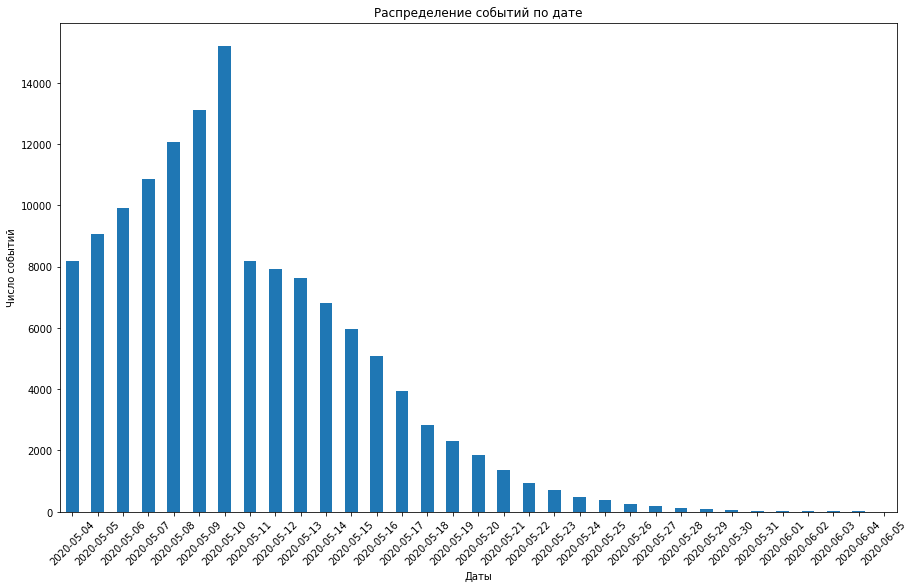

In [13]:
# График распределения по дате
games_data.groupby('event_date').agg({'event': 'count'})\
.plot(kind = 'bar', figsize = (15, 9)).get_legend().remove()
plt.title('Распределение событий по дате')
plt.xlabel('Даты')
plt.ylabel('Число событий')
plt.xticks(rotation = 45)
plt.show()

С 04.05.2020 и до 09.05.2020 наблюдается положительная динамика, число действий растет день ото дня. Пик активности игроков наблюдается 9 мая. После идет сильный спад, до начальных значений (около 8000), и дальше событий все меньше и меньше.  

In [14]:
# База профилей пользователей 
profiles_data = games_data.groupby('user_id').nunique()
profiles_data = profiles_data.drop(columns = ['event', 'event_datetime', 
                                              'building_type', 'project_type', 'event_date', 'day'])
# База пользователей, прошедших 1 уровень
finish_level = games_data.query('event == "finished_stage_1" or event == "project"')

# Объединение таблиц
finish_data = profiles_data.merge(finish_level, on = 'user_id', how = 'outer')
finish_data = finish_data.merge(users_data, on = 'user_id', how = 'outer') 
finish_data = finish_data.fillna('not_finished')
finish_data = finish_data.drop(columns=['event_datetime', 'building_type', 'project_type', 'event_date', 'day'])
display(finish_data.head())
finish_data.info()

,user_id,event,source
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,not_finished,facebook_ads
1,00151b4f-ba38-44a8-a650-d7cf130a0105,not_finished,yandex_direct
2,001aaea6-3d14-43f1-8ca8-7f48820f17aa,not_finished,youtube_channel_reklama
3,001d39dc-366c-4021-9604-6a3b9ff01e25,finished_stage_1,instagram_new_adverts
4,002f508f-67b6-479f-814b-b05f00d4e995,not_finished,facebook_ads


<class 'pandas.core.frame.DataFrame'>
Int64Index: 15442 entries, 0 to 15441
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  15442 non-null  object
 1   event    15442 non-null  object
 2   source   15442 non-null  object
dtypes: object(3)
memory usage: 482.6+ KB


,user_id
event,
finished_stage_1,5817
not_finished,7759
project,1866


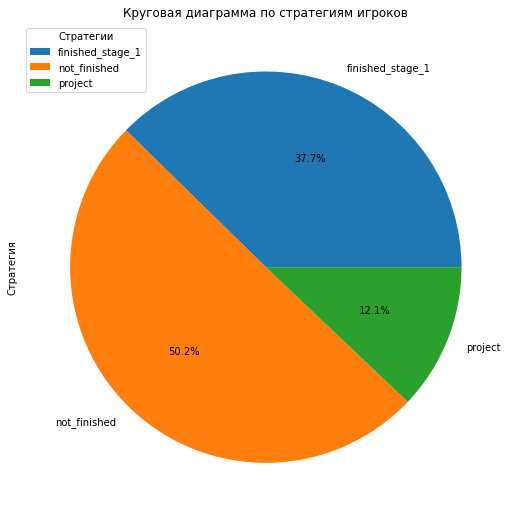

In [15]:
# Распределение числа игроков по стратегиям
strategy_data = finish_data.groupby('event').agg({'user_id': 'count', 'user_id': 'nunique'})
display(strategy_data)

# Круговая диаграмма по стратегиям игроков
strategy_data.plot(kind = 'pie', subplots = True, autopct='%1.1f%%', figsize=(15,9))
plt.title('Круговая диаграмма по стратегиям игроков')
plt.ylabel('Стратегия')
plt.legend(title='Стратегии', loc = 'upper left')
plt.show()

Для игроков можно выделить три типа поведения (стратегии) в игре: 
1. Пройти уровень, победив врага.
2. Пройти уровень, реализав проект.
3. Не проходить уровень, заниматься только строительством объектов.

На графике видно, что 50.2% игроков так и не прошли первый уровень. Из 49.8% прошедших, 37.7% предпочли пройти уровень через pvp, остальные 12.1% через разработку орбитальной сборки спутников. 

In [16]:
# Таблица стоимости кликов по рекламным источникам за весь период 
cost_cac = costs_data.groupby('source').agg({'cost': 'sum'}).sort_values(by = 'cost', ascending = False)
display(cost_cac)

,cost
source,
yandex_direct,"2,233.11"
instagram_new_adverts,"2,161.44"
facebook_ads,"2,140.90"
youtube_channel_reklama,"1,068.12"


На первом месте yandex_direct, далее идут instagram_new_adverts и facebook_ads, стоимость этих 3 каналов приблизительно одинаковая. youtube_channel_reklama обошолся дешевле всего. 	

In [17]:
# Таблица привлечения пользователей для рекламных каналов 
user_cac = finish_data.groupby('source').agg(
    {'user_id': 'count', 'user_id': 'nunique'}).sort_values(by = 'user_id', ascending = False)
display(user_cac)

,user_id
source,
yandex_direct,4817
instagram_new_adverts,3347
facebook_ads,2726
youtube_channel_reklama,2686


Канал yandex_direct привел больше всего людей. Также стоит обратить внимание на facebook_ads, его стоимость в два раза больше, чем у youtube_channel_reklama, а пользователей он привел не намного больше. (facebook_ads - 2726, youtube_channel_reklama	- 2686)      

In [18]:
# Просчитываю САС 
cac_data = user_cac.merge(cost_cac, on = 'source', how = 'outer')
cac_data['cac'] = cac_data['cost'] / cac_data['user_id']
display(cac_data.sort_values(by = 'cac', ascending = False))

,user_id,cost,cac
source,,,
facebook_ads,2726,"2,140.90",0.79
instagram_new_adverts,3347,"2,161.44",0.65
yandex_direct,4817,"2,233.11",0.46
youtube_channel_reklama,2686,"1,068.12",0.40


Наибольшая стоимость привлечения клиентов у facebook_ads - 0.79, наименьшая 0.4 у youtube_channel_reklama. Лучше всего справился yandex_direct, при относительно небольшой стоимости привлечения клиента 0.46, этот источник привел больше всего пользователей.

source,facebook_ads,instagram_new_adverts,yandex_direct,youtube_channel_reklama
event,,,,
finished_stage_1,1150,1466,2042,1159
not_finished,1576,1881,2775,1527
project,391,476,620,379


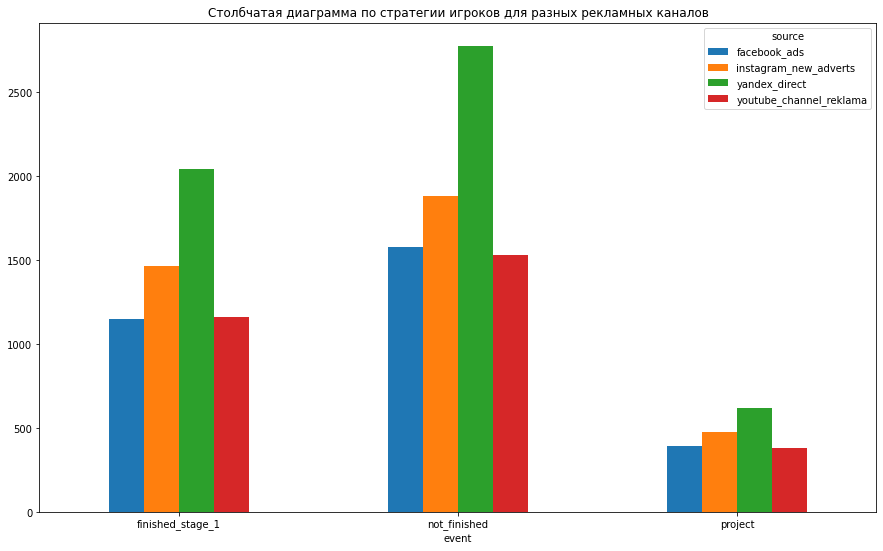

In [19]:
# Таблица и диаграмма по стратегии игроков для разных рекламных каналов
source_pivot = (finish_data.pivot_table(index = 'event', columns ='source',
                            values = 'user_id', aggfunc = 'nunique'))                              
display(source_pivot)
source_pivot.plot.bar(figsize=(15, 9))
plt.title('Столбчатая диаграмма по стратегии игроков для разных рекламных каналов')
plt.xticks(rotation = 0)
plt.show()

Таблица показывает значения больше, чем должно быть, видимо какие то пользователи, помимо пвп, еще и реализуют проект. Изучив график можно сделать вывод, что взаимосвязи между рекламным источником и конкретной стратегией нет.

source,facebook_ads,instagram_new_adverts,yandex_direct,youtube_channel_reklama
building_type,,,,
assembly_shop,11117,13431,19295,10651
research_center,2945,3537,4952,2703
spaceport,12069,14847,20785,11624


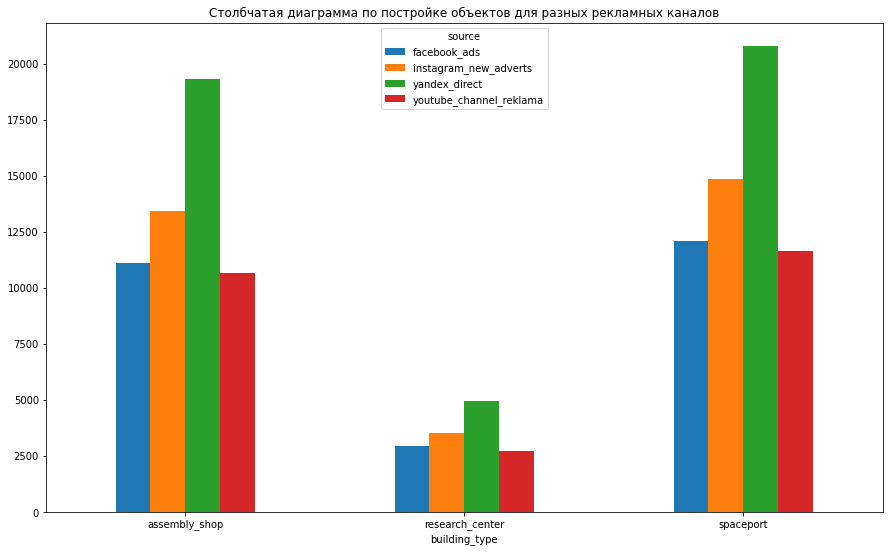

In [20]:
# Таблица и диаграмма по постройке объектов для разных рекламных каналов
good_data = games_data.merge(users_data, on = 'user_id', how = 'outer')
buildings_pivot = (good_data.pivot_table(index = 'building_type', columns ='source',
                            values = 'user_id', aggfunc = 'count'))                              
display(buildings_pivot)
buildings_pivot.plot.bar(figsize=(15, 9))
plt.title('Столбчатая диаграмма по постройке объектов для разных рекламных каналов')
plt.xticks(rotation = 0)
plt.show()

Больше всего построенных зданий у пользователей, пришедших по yandex_direct, вообщем ничего удивительного, этот канал привел больше всего пользователей. Чаще всего и больше всего игроки строят spaceport, далее идет assembly_shop, его строят почти также часто, меньше всего research_center. Очевидно это связано с игровой механикой. Взаимосвязи между рекламным источником и типом построек не обнаружено.       

In [21]:
# Таблица со временем завершения уровня
user_filter = finish_data[finish_data['event'] != 'not_finished']['user_id']
level_time_data = (games_data.query('user_id in @user_filter').groupby('user_id')
              .agg({'event_datetime':['min','max']}))

level_time_data['complete_level_time'] = level_time_data[('event_datetime', 'max')] \
                                       - level_time_data[('event_datetime', 'min')]

level_time_data.columns = level_time_data.columns.droplevel(1)
level_time_data = level_time_data.reset_index().sort_values(by = 'complete_level_time')
display(level_time_data.head())

print('Самое быстрое прохождение уровня: ', level_time_data['complete_level_time'].min())
print('Самое долгое прохождение уровня: ', level_time_data['complete_level_time'].max())
print('Прохождение уровня в среднем: ', level_time_data['complete_level_time'].mean())

,user_id,event_datetime,event_datetime,complete_level_time
91,03990bc0-47b6-44ce-9f8b-3afb1a97d0e7,2020-05-07 16:40:32,2020-05-08 02:19:33,0 days 09:39:01
4687,ced7b368-818f-48f6-9461-2346de0892c5,2020-05-04 00:13:21,2020-05-04 19:47:29,0 days 19:34:08
4547,c8180f71-68dc-4fd5-ba6e-ba5f5d0d28f7,2020-05-08 16:08:29,2020-05-09 11:52:33,0 days 19:44:04
825,2204ae7f-892b-494d-bd58-28816ff35eb5,2020-05-07 02:25:27,2020-05-08 01:02:51,0 days 22:37:24
1032,2ab1cc5a-413a-408e-ba76-01de8e12bead,2020-05-05 13:25:04,2020-05-06 13:43:12,1 days 00:18:08


Самое быстрое прохождение уровня:  0 days 09:39:01
Самое долгое прохождение уровня:  30 days 21:58:53
Прохождение уровня в среднем:  11 days 20:37:59.561801616


,day
source,
facebook_ads,10.15
instagram_new_adverts,10.09
yandex_direct,9.90
youtube_channel_reklama,9.87


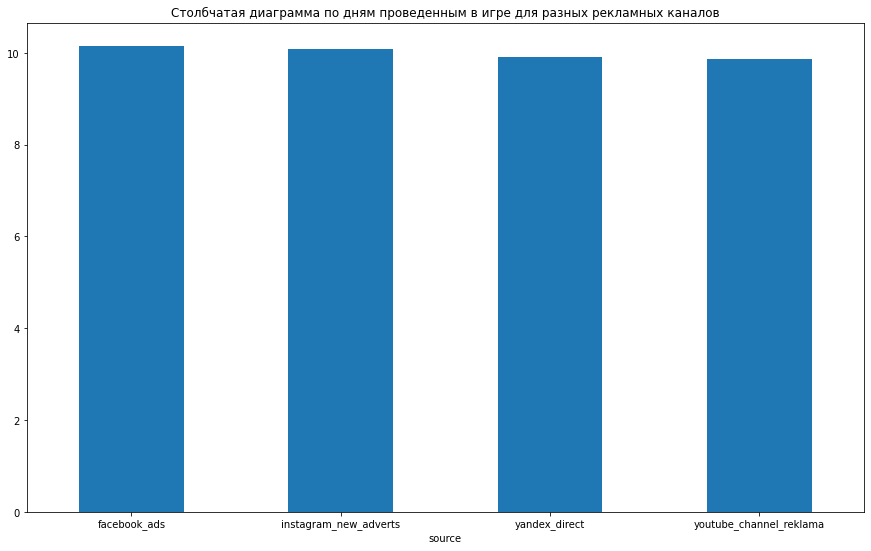

,day
count,"13,576.00"
mean,9.99
std,4.15
min,1.00
25%,6.00
50%,10.00
75%,13.00
max,22.00


In [22]:
# Таблица и диаграмма по дням проведенным в игре для разных рекламных каналов
day_data = good_data.groupby('user_id').agg({'day': 'count'})
time_data = profiles_data.merge(day_data, on = 'user_id', how = 'outer')
time_data = time_data.merge(users_data, on = 'user_id', how = 'outer')
time_group = time_data.groupby('source').agg({'day': 'mean'})
display(time_group)
time_group.plot.bar(figsize=(15, 9)).get_legend().remove()
plt.title('Столбчатая диаграмма по дням проведенным в игре для разных рекламных каналов')
plt.xticks(rotation = 0)
plt.show()
time_data.describe()

В данных графике и таблице мы видим, что в среднем проведенное в игре время, за исследуемый период времени, приблизительно одинаковое. Около 10 дней для всех рекламных источников.  

**Вывод**

1. 50.2% игроков не прошли первый уровень. Из 49.8% прошедших, 37.7% предпочли пройти уровень через pvp, остальные 12.1% через разработку орбитальной сборки спутников.
2. Наибольшая стоимость привлечения клиентов у facebook_ads - 0.79, наименьшая 0.4 у youtube_channel_reklama. Лучше всего справился yandex_direct, при относительно небольшой стоимости привлечения клиента 0.46, этот источник привел больше всего пользователей. Также стоит обратить внимание на facebook_ads, его стоимость почти в два раза больше, чем у youtube_channel_reklama, а клиентов он привел не намного больше. (facebook_ads - 2726, youtube_channel_reklama - 2686)
3. Таблица показывает значения больше, чем должно быть, видимо какие то пользователи, помимо пвп, еще и реализуют проект. Изучив график можно сделать вывод, что взаимосвязи между рекламным источником и конкретной стратегией нет.
4. Больше всего построенных зданий у пользователей, пришедших по yandex_direct, вообщем ничего удивительного, этот канал привел больше всего пользователей. Чаще всего и больше всего игроки строят spaceport, далее идет assembly_shop, его строят почти также часто, меньше всего research_center. Очевидно это связано с игровой механикой. Взаимосвязи между рекламным источником и типом построек не обнаружено.
5. Самое быстрое прохождение уровня: 09:39:01, в среднем игроки затрачивают 11 дней на прохождение уровня.
6. В данных графике и таблице мы видим, что в среднем проведенное в игре время, за исследуемый период времени, приблизительно одинаковое. Около 10 дней для всех рекламных источников.

## 4. Проверка гипотез 

Формулировка гипотез:
    
1. Нулевая гипотеза – Время завершения уровня не различается в зависимости от способа прохождения, параметры равны.
Альтернативная гипотеза – Время завершения уровня различается в зависимости от способа прохождения, параметры не равны.
    
2. Нулевая гипотеза - Количество построенных зданий не различается у пользователей с разных рекламных каналов, параметры равны.
Альтернативная гипотеза - Количество построенных зданий различается у пользователей с разных рекламных каналов, параметры не равны.
    
H₀ всегда формулируется так, чтобы использовать знак равенства.  

count   7,683.00
mean      293.95
std        95.95
min         9.65
25%       231.50
50%       286.52
75%       350.21
max       741.98
Name: complete_level_time, dtype: float64


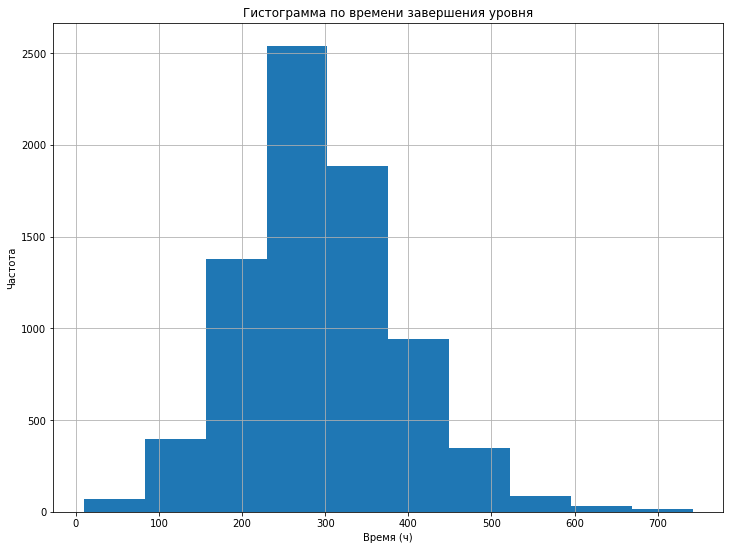

In [23]:
# Гистограмма по времени
complete_data = level_time_data.merge(finish_data, on = 'user_id', how = 'outer')
complete_data['complete_level_time'] = complete_data['complete_level_time'] / np.timedelta64(1, 'h')
print(complete_data['complete_level_time'].describe())
complete_data['complete_level_time'].hist(bins=10, figsize=(12,9))
plt.title('Гистограмма по времени завершения уровня')
plt.xlabel('Время (ч)')
plt.ylabel('Частота')
plt.show()

Гистограмма показывает, что пик значений приходится на ~230 - 300. Распределение нормальное.

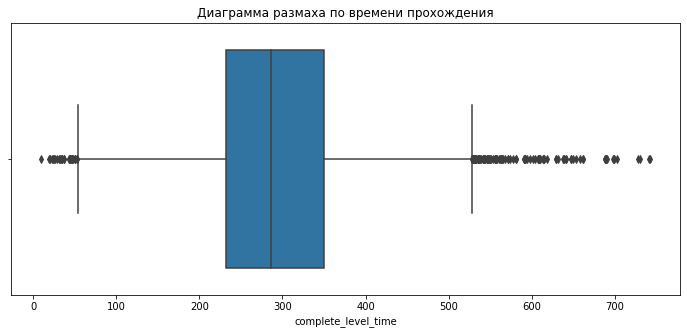

In [24]:
# Диаграмма размаха по времени прохождения
plt.figure(figsize = (12, 5))
sns.boxplot(x = 'complete_level_time', data = complete_data)
plt.title('Диаграмма размаха по времени прохождения')
plt.show()

Диаграмма размаха показывает, что в данных есть выбросы. Нужно сделать срез (от 61 до 515).

In [25]:
# Проверка гипотезы
complete_data = complete_data.query('complete_level_time < 515 and complete_level_time > 61')
pvp_time = complete_data[complete_data['event'] == 'finished_stage_1']['complete_level_time']
project_time = complete_data[complete_data['event'] == 'project']['complete_level_time']

alpha = 0.05
results = st.ttest_ind(pvp_time, project_time) 
print('p-значение: ', results.pvalue)

if results.pvalue < alpha: 
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  7.136258032620015e-53
Отвергаем нулевую гипотезу


Время завершения уровня различается в зависимости от способа прохождения, параметры не равны.

In [26]:
# Таблица построенных зданий у пользователей 
buildings_hyp = (good_data.pivot_table(index = 'user_id', columns ='building_type',
                            values = 'event', aggfunc = 'count'))      
buildings_hyp['total'] = buildings_hyp.sum(axis=1)
buildings_hyp['total'] = buildings_hyp['total'].astype('int')
buildings_hyp = buildings_hyp.merge(users_data, on = 'user_id', how = 'outer')
display(buildings_hyp.head())
facebook_ads = buildings_hyp[buildings_hyp['source'] == 'facebook_ads']['total']
yandex_direct = buildings_hyp[buildings_hyp['source'] == 'yandex_direct']['total']
youtube_channel_reklama = buildings_hyp[buildings_hyp['source'] == 'youtube_channel_reklama']['total']
instagram_new_adverts = buildings_hyp[buildings_hyp['source'] == 'instagram_new_adverts']['total']

,user_id,assembly_shop,research_center,spaceport,total,source
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,6.00,1.00,6.00,13,facebook_ads
1,00151b4f-ba38-44a8-a650-d7cf130a0105,4.00,NaN,5.00,9,yandex_direct
2,001aaea6-3d14-43f1-8ca8-7f48820f17aa,2.00,NaN,2.00,4,youtube_channel_reklama
3,001d39dc-366c-4021-9604-6a3b9ff01e25,4.00,NaN,4.00,8,instagram_new_adverts
4,002f508f-67b6-479f-814b-b05f00d4e995,3.00,1.00,8.00,12,facebook_ads


In [27]:
# Проверка на пересекающихся пользователей в группах
a = buildings_hyp[buildings_hyp['source'] == 'facebook_ads']['user_id']
b = buildings_hyp[buildings_hyp['source'] == 'yandex_direct']['user_id']
c = buildings_hyp[buildings_hyp['source'] == 'youtube_channel_reklama']['user_id']
d = buildings_hyp[buildings_hyp['source'] == 'instagram_new_adverts']['user_id']
result_1 = list(set(a) & set(b)) 
result_2 = list(set(a) & set(c))
result_3 = list(set(a) & set(d))
result_4 = list(set(b) & set(c))
result_5 = list(set(b) & set(d))
result_6 = list(set(c) & set(d))
print('Пересекающихся пользователей в каналах facebook_ads и yandex_direct =', len(result_1))
print('Пересекающихся пользователей в каналах facebook_ads и youtube_channel_reklama =', len(result_2))
print('Пересекающихся пользователей в каналах facebook_ads и instagram_new_adverts =', len(result_3))
print('Пересекающихся пользователей в каналах yandex_direct и youtube_channel_reklama =', len(result_4))
print('Пересекающихся пользователей в каналах yandex_direct и instagram_new_adverts =', len(result_5))
print('Пересекающихся пользователей в каналах youtube_channel_reklama и instagram_new_adverts =', len(result_6))

Пересекающихся пользователей в каналах facebook_ads и yandex_direct = 0
Пересекающихся пользователей в каналах facebook_ads и youtube_channel_reklama = 0
Пересекающихся пользователей в каналах facebook_ads и instagram_new_adverts = 0
Пересекающихся пользователей в каналах yandex_direct и youtube_channel_reklama = 0
Пересекающихся пользователей в каналах yandex_direct и instagram_new_adverts = 0
Пересекающихся пользователей в каналах youtube_channel_reklama и instagram_new_adverts = 0


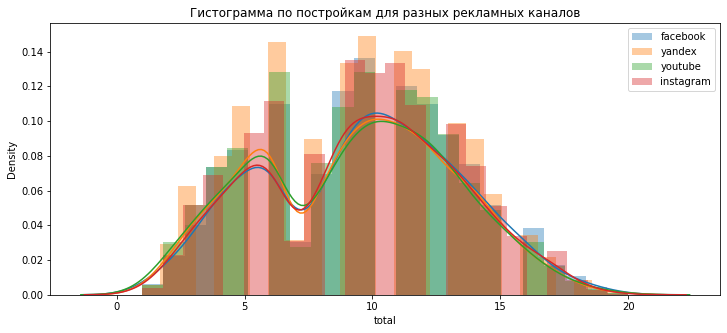

count   13,576.00
mean         9.43
std          3.86
min          1.00
25%          6.00
50%         10.00
75%         12.00
max         20.00
Name: total, dtype: float64


In [28]:
# Гистограмма по постройкам
plt.figure(figsize = (12, 5))
sns.distplot(facebook_ads, label = 'facebook', kde = True)
sns.distplot(yandex_direct, label = 'yandex', kde = True)
sns.distplot(youtube_channel_reklama, label = 'youtube', kde = True)
sns.distplot(instagram_new_adverts, label = 'instagram', kde = True)
plt.title('Гистограмма по постройкам для разных рекламных каналов')
plt.legend()
plt.show()
print(buildings_hyp['total'].describe())

На графике видно, что распределение с двумя пиками. Для проведения анализа лучше провести непараметрический тест Уилкоксона-Манна-Уитни, из-за выбросов в данных.

In [29]:
# Функция для проверки гипотез
def check_hypothesis(source_1, source_2, tital):
    print('Рекламные источники: ', tital)
    bonferroni_alpha = alpha / 6  
    results = st.mannwhitneyu(source_1, source_2)
    print('p-значение: ', results.pvalue)
    if results.pvalue < bonferroni_alpha: 
        print("Отвергаем нулевую гипотезу")
    else:
        print("Не получилось отвергнуть нулевую гипотезу")
    print('---------------------------------------------')
        
check_hypothesis(facebook_ads, yandex_direct, 'facebook_ads/yandex_direct')
check_hypothesis(facebook_ads, youtube_channel_reklama, 'facebook_ads/youtube_channel_reklama')
check_hypothesis(facebook_ads, instagram_new_adverts, 'facebook_ads/instagram_new_adverts')
check_hypothesis(yandex_direct, youtube_channel_reklama, 'yandex_direct/youtube_channel_reklama')
check_hypothesis(yandex_direct, instagram_new_adverts, 'yandex_direct/instagram_new_adverts')
check_hypothesis(youtube_channel_reklama, instagram_new_adverts, 'youtube_channel_reklama/instagram_new_adverts')

Рекламные источники:  facebook_ads/yandex_direct
p-значение:  0.014383638324054673
Не получилось отвергнуть нулевую гипотезу
---------------------------------------------
Рекламные источники:  facebook_ads/youtube_channel_reklama
p-значение:  0.010788356347116118
Не получилось отвергнуть нулевую гипотезу
---------------------------------------------
Рекламные источники:  facebook_ads/instagram_new_adverts
p-значение:  0.38716367306843236
Не получилось отвергнуть нулевую гипотезу
---------------------------------------------
Рекламные источники:  yandex_direct/youtube_channel_reklama
p-значение:  0.6514154789589316
Не получилось отвергнуть нулевую гипотезу
---------------------------------------------
Рекламные источники:  yandex_direct/instagram_new_adverts
p-значение:  0.1018893572665771
Не получилось отвергнуть нулевую гипотезу
---------------------------------------------
Рекламные источники:  youtube_channel_reklama/instagram_new_adverts
p-значение:  0.06600456483354944
Не получило

Количество построенных зданий у пользователей с разных рекламных каналов приблизительно одинаково. Параметры равны. 

**Вывод**

Формулировка гипотез:
    
* Нулевая гипотеза – Время завершения уровня не различается в зависимости от способа прохождения, параметры равны.
Альтернативная гипотеза – Время завершения уровня различается в зависимости от способа прохождения, параметры не равны.
    
* Нулевая гипотеза - Количество построенных зданий не различается у пользователей с разных рекламных каналов, параметры равны.
Альтернативная гипотеза - Количество построенных зданий различается у пользователей с разных рекламных каналов, параметры не равны.

1. Исходя из всех построенных графиков, можно сделать вывод, что пик значений приходится на ~230 - 300. Распределение нормальное, в данных есть выбросы. Нужно сделать срез (от 61 до 515).
2. Время завершения уровня различается в зависимости от способа прохождения, параметры не равны.
3. На графике видно, что распределение с двумя пиками, пересекающихся пользователей не обнаружено. Для проведения анализа лучше провести непараметрический тест Уилкоксона-Манна-Уитни, из-за выбросов в данных. Сравнивается 4 рекламных источника это множественное сравнение. Для корректности результатов, использовал метод Бонферрони.  
4. Количество построенных зданий у пользователей с разных рекламных каналов приблизительно одинаково. Параметры равны.

## 5. Общий вывод 

По данным о событиях, совершенных в мобильной игре«Космические братья», можно сделать несколько выводов:

1. На этапе предобработки были проверены названия в колонках на уникальность. Также были обнаружены и удалены явные дубликаты в количестве 1 штуки, пропуски в таблице games_data связаны с игровой механикой, их можно оставить. Данные о датах были преобразованы в формат datetime, а также был добавлен отдельный столбец для дней. Количество событий: 135639, типов событий: 3, количество уникальных пользователей: 13576.
2. Для игроков можно выделить три типа поведения (стратегии) в игре:
* Пройти уровень, победив врага.
* Пройти уровень, реализав проект.
* Не проходить уровень, заниматься только строительством объектов.

На графике видно, что 50.2% игроков так и не прошли первый уровень. Из 49.8% прошедших, 37.7% предпочли пройти уровень через pvp, остальные 12.1% через разработку орбитальной сборки спутников.

3. Наибольшая стоимость привлечения клиентов у facebook_ads - 0.79, наименьшая 0.4 у youtube_channel_reklama. Лучше всего справился yandex_direct, при относительно небольшой стоимости привлечения клиента 0.46, этот источник привел больше всего пользователей. Также стоит обратить внимание на facebook_ads, его стоимость почти в два раза больше, чем у youtube_channel_reklama, а клиентов он привел не намного больше. (facebook_ads - 2726, youtube_channel_reklama - 2686). Таблица показывает значения больше, чем должно быть, видимо какие то пользователи, помимо пвп, еще и реализуют проект. Изучив график можно сделать вывод, что взаимосвязи между рекламным источником и конкретной стратегией нет.
4. Больше всего построенных зданий у пользователей, пришедших по yandex_direct, вообщем ничего удивительного, этот канал привел больше всего пользователей. Чаще всего и больше всего игроки строят spaceport, далее идет assembly_shop, его строят почти также часто, меньше всего research_center. Очевидно это связано с игровой механикой. Взаимосвязи между рекламным источником и типом построек не обнаружено.
5. Самое быстрое прохождение уровня: 09:39:01, в среднем игроки затрачивают 11 дней на прохождение уровня. По данным из графика и таблицы можно сделать вывод, что в среднем проведенное в игре время, за исследуемый период времени, приблизительно одинаковое. Около 10 дней для всех рекламных источников. 
6. Время завершения уровня различается в зависимости от способа прохождения, параметры не равны.
7. Количество построенных зданий у пользователей с разных рекламных каналов приблизительно одинаково. Параметры равны.